In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
data = pd.read_csv("durudataset.txt",sep="\t",names=["A","B"]).values

In [17]:
data

array([[0.19670575, 0.26617497],
       [0.41328699, 0.35582835],
       [0.33843555, 0.43573826],
       [0.10380152, 0.16434481],
       [0.15905236, 0.32505901],
       [0.06690549, 0.48741807],
       [0.33573144, 0.03798368],
       [0.28549554, 0.29350958],
       [0.08488353, 0.20694325],
       [0.07382789, 0.15456821],
       [0.23803986, 0.13191702],
       [0.45405121, 0.37938313],
       [0.27608751, 0.49760799],
       [0.01646995, 0.09328572],
       [0.02693146, 0.39057263],
       [0.40253161, 0.09789899],
       [0.22568743, 0.49617949],
       [0.19132311, 0.40113078],
       [0.39482185, 0.21211335],
       [0.18214343, 0.36443193],
       [1.49835358, 1.40350139],
       [1.80899027, 1.93497909],
       [1.35650893, 1.47948455],
       [1.07324343, 1.23179161],
       [1.59099146, 1.39629025],
       [1.91018783, 1.70507748],
       [1.19376594, 1.55855903],
       [1.43236779, 1.7566307 ],
       [1.74915973, 1.99548106],
       [1.03918449, 1.9624314 ],
       [1.

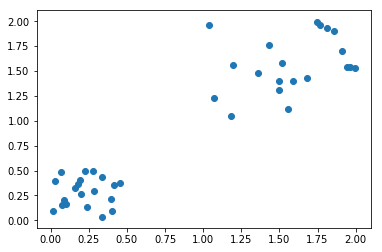

In [18]:
plt.scatter(data[:,0],data[:,1])

In [19]:
def euclidian(A,B):
    return np.sqrt(sum(list(map(lambda x,y:(x-y)**2,A,B))))  

In [20]:
def k_mean(data,iteration,k):
    init_centroid = data[np.random.randint(0,len(data)-1,size=k)]
    centroid_collection = []
    centroid_collection.append(init_centroid)
    belong = np.zeros([len(data),1])
    for t in range(iteration):
        for num_instance,instance in enumerate(data):
                temp_dist = np.zeros([k,1])
                for centroid_num,centroid in enumerate(init_centroid):
                    temp_dist[centroid_num] = euclidian(centroid,instance)
                belong[num_instance] = np.argmin(temp_dist)
                temp_centroid = np.zeros(init_centroid.shape)
        for index in range(len(init_centroid)):
                cluster = [i for i in range(len(belong)) if belong[i] == index]
                mean_centroid = np.mean(data[cluster],axis=0)
                temp_centroid[index,:] = mean_centroid
        centroid_collection.append(temp_centroid)
        init_centroid = temp_centroid
    return init_centroid,belong,centroid_collection



                        
                

In [21]:
centroid,cluster_belong,centroids_collection = k_mean(data,10,2)
#centroid = np.array(centroid)

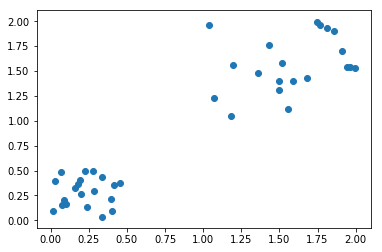

In [22]:
plt.scatter(data[:,0],data[:,1])
#plt.scatter(centroid[:,0],centroid[:,1],c=["red","pink"])

In [23]:

def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.pause(0.8)



centroids 1 [0.22331067 0.28960446]


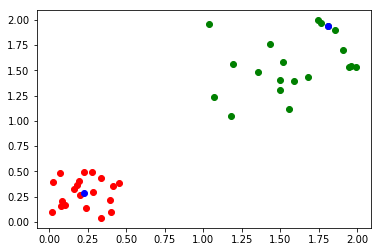

centroids 1 [1.58058247 1.56897412]
centroids 2 [0.22331067 0.28960446]
centroids 2 [1.58058247 1.56897412]
centroids 3 [0.22331067 0.28960446]
centroids 3 [1.58058247 1.56897412]
centroids 4 [0.22331067 0.28960446]
centroids 4 [1.58058247 1.56897412]
centroids 5 [0.22331067 0.28960446]
centroids 5 [1.58058247 1.56897412]
centroids 6 [0.22331067 0.28960446]
centroids 6 [1.58058247 1.56897412]
centroids 7 [0.22331067 0.28960446]
centroids 7 [1.58058247 1.56897412]
centroids 8 [0.22331067 0.28960446]
centroids 8 [1.58058247 1.56897412]
centroids 9 [0.22331067 0.28960446]
centroids 9 [1.58058247 1.56897412]
centroids 10 [0.22331067 0.28960446]
centroids 10 [1.58058247 1.56897412]


In [24]:
plot(data,centroids_collection,cluster_belong)